<a href="https://colab.research.google.com/github/Saroramath/MachineLearning/blob/main/6205A/6205A3TempData1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning goals

1. Prepare the time series data into samples.
2. We will us primitive commands to understand the sample generation steps.

In [1]:
!pip install netCDF4

     |████████████████████████████████| 4.7MB 6.1MB/s 
     |████████████████████████████████| 317kB 40.0MB/s 


In [2]:
from netCDF4 import Dataset
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [4]:
from google.colab import files
#uploaded = files.upload()

In [ ]:
#drive.mount('/content/gdrive')

> The file is too big to call as raw from github or to use upload. 

Upload the file in sample_data directory from system.

In [5]:
file = '/content/sample_data/tempStJohns.nc'

# Explore the data

In [6]:
df = Dataset(file)

In [7]:
df

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2021-02-03 00:49:51 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/data2/adaptor.mars.internal-1612306467.0641284-4955-27-685dbd6e-9572-4267-a9a7-5a61b7e919e4.nc /cache/tmp/685dbd6e-9572-4267-a9a7-5a61b7e919e4-adaptor.mars.internal-1612306467.0646257-4955-9-tmp.grib
    dimensions(sizes): longitude(1), latitude(1), expver(2), time(87672)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 expver(expver), int32 time(time), int16 t2m(time, expver, latitude, longitude)
    groups: 

In [8]:
df['longitude'][0] #longitude of the place

masked_array(data=-52.75,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [9]:
df['time'] # Time series units: hours since 1900-01-01 00:00:00.0

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (87672,)
filling on, default _FillValue of -2147483647 used

In [10]:
time = df['time'][:] #start value 973008, end value 1060679

In [11]:
time

masked_array(data=[ 973008,  973009,  973010, ..., 1060677, 1060678,
                   1060679],
             mask=False,
       fill_value=999999,
            dtype=int32)

In [12]:
time.shape

(87672,)

> Consider columns with time data

In [13]:
 df['t2m'][:,0,0,0]

masked_array(data=[272.81080791804084, 272.6567134137989,
                   272.7837285490946, ..., --, --, --],
             mask=[False, False, False, ...,  True,  True,  True],
       fill_value=-32767)

> Convert to Celsius

In [14]:
temp = df['t2m'][:,0,0,0]-273.15

> Masked arrays are arrays that may have missing or invalid entries. The numpy.ma module provides a nearly work-alike replacement for numpy that supports data arrays with masks.



In [15]:
temp 

masked_array(data=[-0.3391920819591405, -0.4932865862010658,
                   -0.36627145090540125, ..., --, --, --],
             mask=[False, False, False, ...,  True,  True,  True],
       fill_value=-32767)

 The array is masked, filled with -32767 for the missing values, mask tells us where is that happeneing.

In [16]:
temp.data 

array([-3.39192082e-01, -4.93286586e-01, -3.66271451e-01, ...,
       -3.27670000e+04, -3.27670000e+04, -3.27670000e+04])

In [17]:
temp.shape

(87672,)

In [18]:
temp.mask

array([False, False, False, ...,  True,  True,  True])

## Rmoving masked values.

First we check if the masked values are continuous or not.

In [19]:
missing = np.where(temp.mask == True)

In [20]:
missing[0][0] # The missing data is infact continuous so our time series is not broken anywhere

86928

In [21]:
temp = temp[~temp.mask] #use the inverse of the mask as an index.

In [22]:
temp.shape # This is a continuous time series for temperature.

(86928,)

Reducing time seris to match with it

In [23]:
time = time[:86928]

In [24]:
time.shape

(86928,)

Find the unique value in numpy

In [25]:
np.unique(temp.mask) #All values are genuine now

array([False])

## Plot the temperature over time.

Plot the time series against time




In [26]:
number_of_years = (time-973008)/8760 

Temperature plot over approximately 10 years

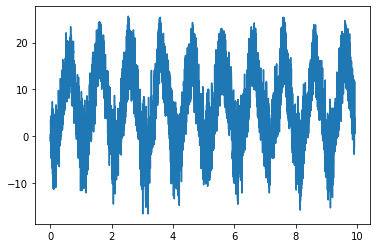

In [27]:
plt.plot(number_of_years,temp)

## Standardize the temperature

In [28]:
temp.shape

(86928,)

In [29]:
temp.mean()

5.57589982331033

In [30]:
temp.std()

7.754305350561417

(array([  297.,  2100.,  6706., 15629., 17035., 14113., 12733., 11795.,
         5601.,   919.]),
 array([-16.62485352, -12.39963379,  -8.17441406,  -3.94919434,
          0.27602539,   4.50124512,   8.72646484,  12.95168457,
         17.1769043 ,  21.40212402,  25.62734375]),
 <a list of 10 Patch objects>)

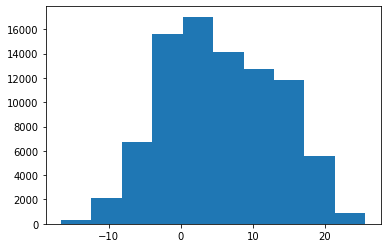

In [31]:
plt.hist(temp)

In [ ]:
#temp = (temp - temp.mean())/temp.std()

In [ ]:
temp.mean()

5.57589982331033

In [ ]:
temp.std()

7.754305350561417

In [ ]:
temp.max()

25.627343750000023

In [ ]:
temp.min()

-16.624853515624977

## Generate Samples

We will avoid using functions to generate smaples to understand the process.

We want the prediction model to predict the next 6 hr of data with previous 6 hrs of temp data available.

In [ ]:
temp[0:6]

masked_array(data=[-0.3391920819591405, -0.4932865862010658,
                   -0.36627145090540125, -0.1728473870034577,
                   -0.26569093767636787, -0.4346146201507963],
             mask=[False, False, False, False, False, False],
       fill_value=-32767)

We make the vectors of size 6

In [32]:
data = []

for i in range(len(temp)-6+1):
  data.append(temp[i:i+6].data)



In [33]:
data_array = np.array(data) #turn into np array

In [34]:
data_array[-1]

array([3.87164979, 3.79943814, 1.65565476, 1.5350871 , 0.54088741,
       0.78266749])

In [35]:
temp[-6:]

masked_array(data=[3.8716497891866197, 3.79943813866322,
                   1.6556547637497943, 1.53508709725088,
                   0.5408874087947879, 0.7826674886722458],
             mask=[False, False, False, False, False, False],
       fill_value=-32767)

In [36]:
data_array.max()

25.627343750000023

In [37]:
data_array[0]

array([-0.33919208, -0.49328659, -0.36627145, -0.17284739, -0.26569094,
       -0.43461462])

In [38]:
data_array[5]

array([-0.43461462, -0.64415736, -0.80405458, -1.18509999, -1.09548017,
       -1.02068953])

In [39]:
data_array[86922]

array([3.87164979, 3.79943814, 1.65565476, 1.5350871 , 0.54088741,
       0.78266749])

In [40]:
data_array[-1]

array([3.87164979, 3.79943814, 1.65565476, 1.5350871 , 0.54088741,
       0.78266749])

In [41]:
data_array[-7]

array([2.06893751, 2.18370246, 2.84908124, 3.12825664, 3.38099741,
       3.79363542])

In [42]:
data_array.shape

(86923, 6)

In [43]:
data_array.dtype

dtype('float64')

In [44]:
temp_total = data_array[:-6] #till -6 so -7 is included

In [45]:
temp_total.shape

(86917, 6)

In [46]:
temp_total[-1]

array([2.06893751, 2.18370246, 2.84908124, 3.12825664, 3.38099741,
       3.79363542])

In [47]:
label_total = data_array[6:]

In [48]:
label_total.shape

(86917, 6)

> Split the samples into train and test data

In [49]:
temp_train_number = np.int(0.8*len(temp_total))

In [50]:
temp_train_number

69533

In [51]:
train_temp = temp_total[:temp_train_number]

In [ ]:
train_temp.shape

(69533, 6)

In [52]:
train_temp[temp_train_number-1]

array([-0.77310673, -0.56485349, -0.4797469 , -0.47200994, -0.68284217,
       -0.84338414])

In [53]:
train_label = label_total[:temp_train_number]

In [54]:
train_label.shape

(69533, 6)

In [55]:
test_temp = temp_total[temp_train_number:]

In [56]:
test_label = label_total[temp_train_number:]

In [58]:
print(test_label.shape)
print(test_temp.shape)

(17384, 6)
(17384, 6)


In [59]:
test_temp[1].shape

(6,)

#  Persistence Model

In [60]:
def model_persistence(test_temp_entry):
  arr = np.full((6,),test_temp_entry[5])

  return arr

In [61]:
test_temp[1]

array([-0.4797469 , -0.47200994, -0.68284217, -0.84338414, -1.15157315,
       -1.24312721])

In [62]:
model_persistence(test_temp[1])

array([-1.24312721, -1.24312721, -1.24312721, -1.24312721, -1.24312721,
       -1.24312721])

In [63]:
def y_persis(test_temp):
  arr = np.empty(test_temp.shape)
  for i in range(len(test_temp)):
    arr[i] = model_persistence(test_temp[i])
  return arr    

In [64]:
test_temp.shape

(17384, 6)

In [66]:
y_persistence = y_persis(test_temp)

### MSE_Persistence

In [68]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [69]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test_label, y_persistence))
print('Coefficient of determination: %.2f'
      % r2_score(test_label, y_persistence))

Mean squared error: 2.91
Coefficient of determination: 0.95


### Plot the temp

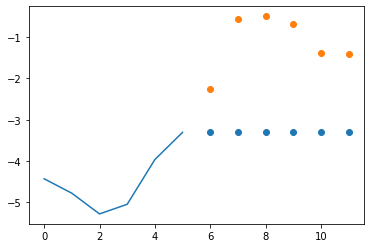

In [70]:
z = np.linspace(6, 11,6)
plt.plot(test_temp[101])
plt.scatter(z,y_persistence[101])
plt.scatter(z,test_label[101])

# Linear regression using Sklearn

In [71]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [72]:
linear_regression = linear_model.LinearRegression()

In [73]:
linear_regression.fit(train_temp, train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
predict_label = linear_regression.predict(test_temp)

### MSE_Linear_Regression

In [75]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test_label, predict_label))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test_label, predict_label))

Mean squared error: 2.23
Coefficient of determination: 0.96


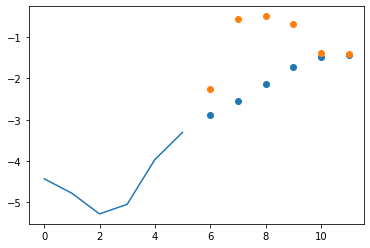

In [ ]:
z = np.linspace(6, 11,6)
plt.plot(test_temp[101])
plt.scatter(z,predict_label[101])
plt.scatter(z,test_label[101])

# Neural Network

## Normalize the data

In [76]:
train_temp_max = train_temp.max()
train_temp_min = train_temp.min()

train_temp_norm = (train_temp- train_temp_min)/(train_temp_max-train_temp_min)
test_temp_norm = (test_temp- train_temp_min)/(train_temp_max-train_temp_min)

train_label_norm = (train_label- train_temp_min)/(train_temp_max-train_temp_min)
test_label_norm = (test_label- train_temp_min)/(train_temp_max-train_temp_min)



In [77]:
train_temp.max()

25.627343750000023

In [78]:
train_label.min()

-16.624853515624977

In [ ]:
#inp = tf.keras.layers.Input(shape=(6,))     # Sequential api
#b = tf.keras.layers.Dense(128,activation='relu')(inp)
##b = tf.keras.layers.Dense(128,activation='relu')(inp)
#b = tf.keras.layers.Dense(128,activation='relu')(inp)
#out = tf.keras.layers.Dense(6, activation='linear')(b)

#model = tf.keras.models.Model(inp,out)
#model.summary()

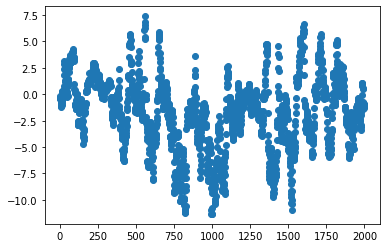

In [79]:
axis = np.linspace(0,1999,2000)
axisy = temp[0:2000]
plt.scatter(axis,axisy)

## Model

In [85]:
model = tf.keras.models.Sequential([
  
  tf.keras.layers.Input(shape=(6,)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(6, activation='linear')
])

# Compile the model, i.e. associate a loss function and the chosen variant of GD
model.compile(
    loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError(),'accuracy']
)

# Summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 774       
Total params: 34,694
Trainable params: 34,694
Non-trainable params: 0
_________________________________________________________________


In [86]:
test = test_temp_norm, test_label_norm

In [87]:
hist = model.fit(train_temp_norm,train_label_norm ,batch_size=64, epochs=40,callbacks = tf.keras.callbacks.EarlyStopping(patience=3), validation_data= test)

Epoch 1/40
1087/1087 [==============================] - 4s 3ms/step - loss: 0.0134 - mean_absolute_error: 0.0572 - accuracy: 0.2578 - val_loss: 0.0013 - val_mean_absolute_error: 0.0249 - val_accuracy: 0.2136
Epoch 2/40
1087/1087 [==============================] - 3s 3ms/step - loss: 0.0015 - mean_absolute_error: 0.0276 - accuracy: 0.3373 - val_loss: 0.0012 - val_mean_absolute_error: 0.0238 - val_accuracy: 0.3010
Epoch 3/40
1087/1087 [==============================] - 3s 3ms/step - loss: 0.0015 - mean_absolute_error: 0.0271 - accuracy: 0.3797 - val_loss: 0.0012 - val_mean_absolute_error: 0.0248 - val_accuracy: 0.4535
Epoch 4/40
1087/1087 [==============================] - 3s 3ms/step - loss: 0.0015 - mean_absolute_error: 0.0272 - accuracy: 0.4164 - val_loss: 0.0013 - val_mean_absolute_error: 0.0255 - val_accuracy: 0.4368
Epoch 5/40
1087/1087 [==============================] - 3s 3ms/step - loss: 0.0015 - mean_absolute_error: 0.0268 - accuracy: 0.4147 - val_loss: 0.0012 - val_mean_absolu

In [82]:
test_temp

array([[-0.56485349, -0.4797469 , -0.47200994, -0.68284217, -0.84338414,
        -1.15157315],
       [-0.4797469 , -0.47200994, -0.68284217, -0.84338414, -1.15157315,
        -1.24312721],
       [-0.47200994, -0.68284217, -0.84338414, -1.15157315, -1.24312721,
        -1.32629955],
       ...,
       [ 2.02251574,  1.99027839,  2.06893751,  2.18370246,  2.84908124,
         3.12825664],
       [ 1.99027839,  2.06893751,  2.18370246,  2.84908124,  3.12825664,
         3.38099741],
       [ 2.06893751,  2.18370246,  2.84908124,  3.12825664,  3.38099741,
         3.79363542]])

In [134]:
prediction = model.predict(test_temp_norm)

In [139]:
model.evaluate(test_temp_norm,  test_label_norm, verbose=2)

544/544 - 0s - loss: 0.0012 - mean_absolute_error: 0.0235 - accuracy: 0.5021


[0.0011612174566835165, 0.023493632674217224, 0.5021284222602844]

## Scale back to prediction temperature

In [136]:
y_predict_norm = model.predict(test_temp_norm)

In [137]:
y_predict = train_temp_min + y_predict_norm * (train_temp_max-train_temp_min)

##MSE_Neural_Network

In [138]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test_label, y_predict))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test_label, predict_label))

Mean squared error: 2.07
Coefficient of determination: 0.96


## Plot the temp

In [103]:
z = np.linspace(6,11 ,6)

In [104]:
test_temp[0]

array([-0.56485349, -0.4797469 , -0.47200994, -0.68284217, -0.84338414,
       -1.15157315])

In [105]:
test_label[0]

array([-1.24312721, -1.32629955, -1.44493298, -1.40689291, -1.32952329,
       -1.26891708])

In [106]:
y_predict[0]


array([-1.597003 , -1.7698803, -1.8526812, -1.9244137, -1.9158201,
       -1.8699999], dtype=float32)

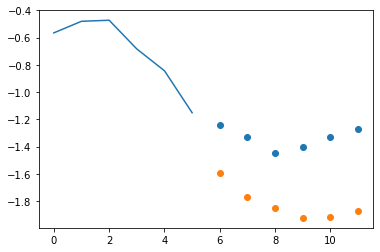

In [107]:
z = np.linspace(6, 11,6)
plt.plot(test_temp[0])
plt.scatter(z,test_label[0])
plt.scatter(z,y_predict[0])

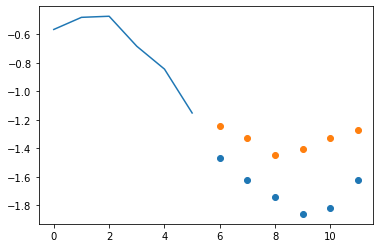

In [ ]:
i = 0
plt.plot(test_temp[i])
plt.scatter(z,y_predict[i])
plt.scatter(z,test_label[i]) # What shappeneing is that predicted values are so large in comparison to the test amd label values that is approximately starilght line

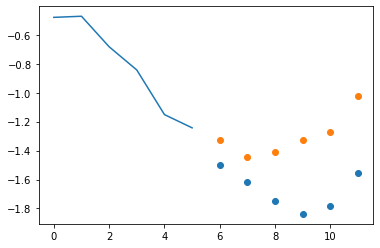

In [ ]:
i = 1
plt.plot(test_temp[i])
plt.scatter(z,y_predict[i])
plt.scatter(z,test_label[i])

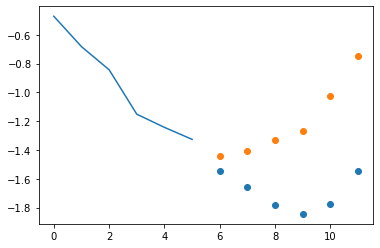

In [ ]:
i = 2
plt.plot(test_temp[i])
plt.scatter(z,y_predict[i])
plt.scatter(z,test_label[i])

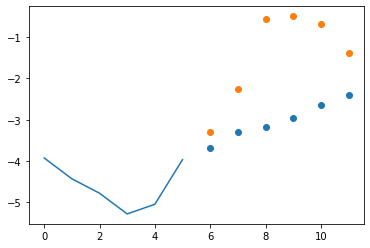

In [ ]:
i = 100
plt.plot(test_temp[i])
plt.scatter(z,y_predict[i])
plt.scatter(z,test_label[i])

# Regression in keras

From the perspective of linear regression errors it is very small error. We will do regression moddeling before normalzing.

In [ ]:
model = tf.keras.models.Sequential([
  
  tf.keras.layers.Input(shape=(6,)),
  tf.keras.layers.Dense(6, activation='linear')
])

# Compile the model, i.e. associate a loss function and the chosen variant of GD
model.compile(
    loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError(),'accuracy']
)

# Summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy','mse'],
)

In [ ]:
hist = model.fit(train_temp,train_label, epochs=40)

Epoch 1/40
2173/2173 [==============================] - 3s 1ms/step - loss: 120.9441 - accuracy: 0.2439 - mse: 120.9441
Epoch 2/40
2173/2173 [==============================] - 2s 1ms/step - loss: 4.3922 - accuracy: 0.2456 - mse: 4.3922
Epoch 3/40
2173/2173 [==============================] - 2s 1ms/step - loss: 3.6489 - accuracy: 0.2484 - mse: 3.6489
Epoch 4/40
2173/2173 [==============================] - 2s 1ms/step - loss: 3.1914 - accuracy: 0.2426 - mse: 3.1914
Epoch 5/40
2173/2173 [==============================] - 2s 1ms/step - loss: 2.9915 - accuracy: 0.2535 - mse: 2.9915
Epoch 6/40
2173/2173 [==============================] - 2s 1ms/step - loss: 2.8973 - accuracy: 0.2784 - mse: 2.8973
Epoch 7/40
2173/2173 [==============================] - 2s 1ms/step - loss: 2.8300 - accuracy: 0.2857 - mse: 2.8300
Epoch 8/40
2173/2173 [==============================] - 2s 1ms/step - loss: 2.7624 - accuracy: 0.3083 - mse: 2.7624
Epoch 9/40
2173/2173 [==============================] - 2s 1ms/step 

In [ ]:
model.evaluate(test_temp,  test_label, verbose=2)

544/544 - 1s - loss: 2.2461 - accuracy: 0.4008 - mse: 2.2461


[2.246098518371582, 0.40077081322669983, 2.246098518371582]

In [116]:
y_predict_LR = model.predict(test_temp)

In [ ]:
y_predict_LR

array([[-1.2454104 , -1.307592  , -1.3525971 , -1.3658248 , -1.3274018 ,
        -1.2466521 ],
       [-1.291865  , -1.305621  , -1.3108383 , -1.2715758 , -1.1906363 ,
        -1.0800922 ],
       [-1.3428339 , -1.3227929 , -1.2763408 , -1.19372   , -1.0665889 ,
        -0.95436096],
       ...,
       [ 3.3527043 ,  3.515858  ,  3.6841345 ,  3.8402793 ,  3.91517   ,
         3.9064612 ],
       [ 3.5468652 ,  3.7029226 ,  3.8450603 ,  3.9284077 ,  3.8844898 ,
         3.8730223 ],
       [ 4.0266366 ,  4.2277656 ,  4.317169  ,  4.3157773 ,  4.3351746 ,
         4.268685  ]], dtype=float32)

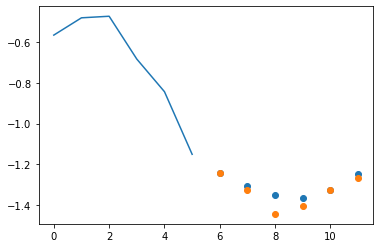

In [ ]:
plt.plot(test_temp[0])
plt.scatter(z,y_predict_LR[0])
plt.scatter(z,test_label[0])

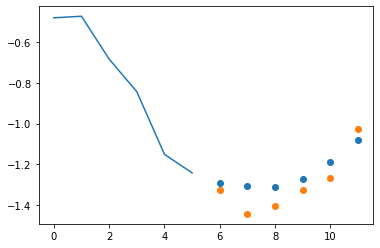

In [ ]:
plt.plot(test_temp[1])
plt.scatter(z,y_predict_LR[1])
plt.scatter(z,test_label[1])

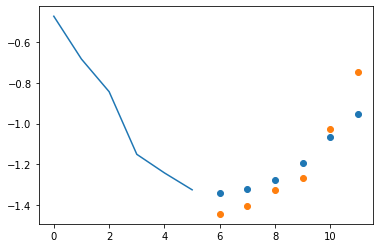

In [ ]:
i = 2
plt.plot(test_temp[i])
plt.scatter(z,y_predict_LR[i])
plt.scatter(z,test_label[i])

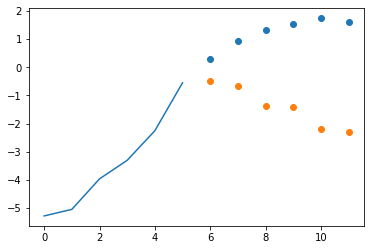

In [ ]:
i = 103
plt.plot(test_temp[i])
plt.scatter(z,y_predict_LR[i])
plt.scatter(z,test_label[i])

# Model comparison


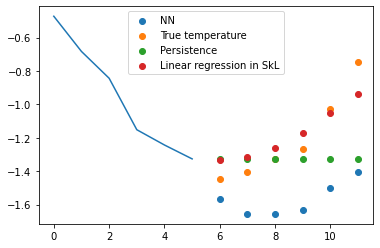

In [120]:
i = 2
z = np.linspace(6, 11,6)
plt.plot(test_temp[i])
plt.scatter(z,y_predict[i], label = 'NN')
plt.scatter(z,test_label[i], label = 'True temperature')
plt.scatter(z,y_persistence[i], label= 'Persistence')
plt.scatter(z,predict_label[i], label='Linear regression in SkL')
#plt.scatter(z,y_predict_LR[i], label='Linear regression in Keras')

plt.legend(loc='best')



## MSE

> We will check how MSE grows for predicted value on time axis.

In [109]:
def mse(predict):
  mse = np.ones((6,))
  for i in range(6):
     mse[i]= np.mean((test_label[:,i]-predict[:,i])**2)
  return mse 
   

In [110]:
mse(y_persistence)

array([0.35972371, 1.07371118, 2.07985822, 3.28047643, 4.64512448,
       6.02902107])

In [111]:
mse(predict_label)

array([0.26058447, 0.74443819, 1.48635777, 2.39683583, 3.60120436,
       4.87836731])

In [112]:
mse(test_label) #test

array([0., 0., 0., 0., 0., 0.])

In [113]:
mse(y_predict) #NN

array([0.32178567, 0.7836183 , 1.44694326, 2.22438326, 3.27533512,
       4.38630089])

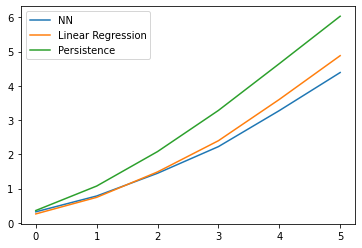

In [123]:
plt.plot(mse(y_predict), label = 'NN')
plt.plot(mse(predict_label), label = 'Linear Regression')
plt.plot(mse(y_persistence), label = 'Persistence')
plt.legend(loc='best')

# 12hrs data

## Generate samples primitively 

In [ ]:
data = []

for i in range(len(temp)-18+1):
  data.append(temp[i:i+12].data)

In [ ]:
data_array = np.array(data) #turn into np array

In [ ]:
data_array.shape

(86911, 12)

In [ ]:
data_array[-1]

array([2.12567524, 2.0921484 , 2.09021416, 2.07087175, 2.02251574,
       1.99027839, 2.06893751, 2.18370246, 2.84908124, 3.12825664,
       3.38099741, 3.79363542])

In [ ]:
temp[-6:]

masked_array(data=[3.8716497891866197, 3.79943813866322,
                   1.6556547637497943, 1.53508709725088,
                   0.5408874087947879, 0.7826674886722458],
             mask=[False, False, False, False, False, False],
       fill_value=-32767)

In [ ]:
temp[-18:]

masked_array(data=[2.1256752390315796, 2.0921484012885685,
                   2.090214160649566, 2.0708717542593718,
                   2.0225157382838574, 1.9902783943002191,
                   2.0689375136203125, 2.1837024582021627,
                   2.849081238024951, 3.1282566369234246,
                   3.380997413755324, 3.7936354167462127,
                   3.8716497891866197, 3.79943813866322,
                   1.6556547637497943, 1.53508709725088,
                   0.5408874087947879, 0.7826674886722458],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False],
       fill_value=-32767)

In [ ]:
temp[-1]

0.7826674886722458

In [ ]:
label = []
for i in range(len(temp)-18+1):
  label.append(temp[i+12:i+18].data)


In [ ]:
label_array = np.array(label)

In [ ]:
label_array.shape

(86911, 6)

In [ ]:
label_array[-1]

array([3.87164979, 3.79943814, 1.65565476, 1.5350871 , 0.54088741,
       0.78266749])

# Formalise the data generation

In [124]:
future = 6
past = 12

In [125]:
data = []

for i in range(len(temp)- (future + past)  +1):
  data.append(temp[i:i+past].data)
data  = np.array(data) 

In [126]:
label = []
for i in range(len(temp)- (future + past)  +1):
  label.append(temp[i+ past:i+past + future].data)

label = np.array(label)


In [133]:
label.shape

(86911, 6)

# Different past and future data

> In next notebiik, we change all code to generalised version with any past and future data. We will run for 12hrs and 24 hrs past data. 